
# Background

Cab booking system is the process where renting a cab is automated through an app
throughout a city. Using this app, people can book a cab from one location to another location.
Being a cab booking app company, exploiting the understanding of cab supply and demand
could increase the efficiency of their service and enhance user experience by minimizing
waiting time.

Objective of this project is to combine historical usage pattern along with the open data sources
like weather data to forecast cab booking demand in a city.

# PROCESS FLOW

You will be provided with hourly renting data span of two years. Data is randomly divided into
train and test set. You must predict the total count of cabs booked in each hour covered by the
test set, using the information available prior to the booking period. You need to append the
train_label dataset to train.csv as ‘Total_booking’ column.


### Please find the descriptions of the columns present in the dataset as below.
    datetime - hourly date + timestamp

    season - spring, summer, autumn, winter

    holiday - whether the day is considered a holiday

    workingday - whether the day is neither a weekend nor holiday

    weather - Clear , Cloudy, Light Rain, Heavy temp - temperature in Celsius

    atemp - "feels like" temperature in Celsius

    humidity - relative humidity

    windspeed - wind speed 

    Total_booking - number of total booking

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRFRegressor
from sklearn.ensemble import GradientBoostingRegressor


 # DATA COLLECTION AND PREPARATION

In [193]:
df_train= pd.read_csv('train.csv')

In [194]:

df_train_label= pd.read_csv('train_label.csv',header=None,names=['Total_booking'])

In [195]:
#appending the train_label dataset to train.csv as ‘Total_booking’ column.
df_train1=df_train.join(df_train_label)

In [196]:
df_train1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/02/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/05/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184
...,...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1
8706,11/07/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92


In [197]:
df_test= pd.read_csv('test-project.csv')

In [198]:

df_test_label= pd.read_csv('test_label.csv',header=None,names=['Total_booking'])

In [199]:
#appending the train_label dataset to train.csv as ‘Total_booking’ column.
df_test1=df_test.join(df_test_label)

In [200]:
df_test1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/09/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/06/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/02/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668
...,...,...,...,...,...,...,...,...,...,...
2173,3/08/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,144
2175,3/07/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,159
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,29


# Task 1:
# 1. Visualize data using different visualizations to generate interesting insights

In [201]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       8708 non-null   object 
 1   season         8708 non-null   object 
 2   holiday        8708 non-null   int64  
 3   workingday     8708 non-null   int64  
 4   weather        8708 non-null   object 
 5   temp           8708 non-null   float64
 6   atemp          8708 non-null   float64
 7   humidity       8708 non-null   int64  
 8   windspeed      8708 non-null   float64
 9   Total_booking  8708 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 680.4+ KB


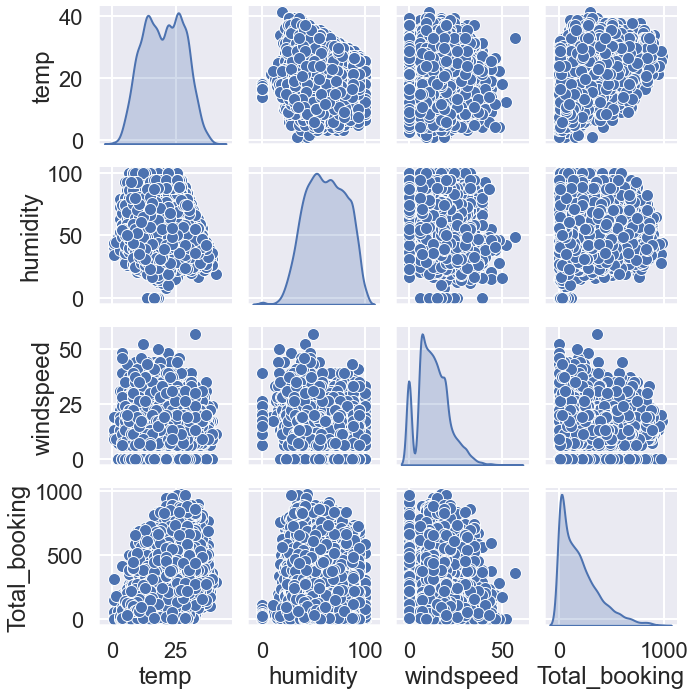

In [202]:
#Explore data
sns.pairplot(df_train1[["temp","humidity","windspeed","Total_booking"]], diag_kind ='kde')

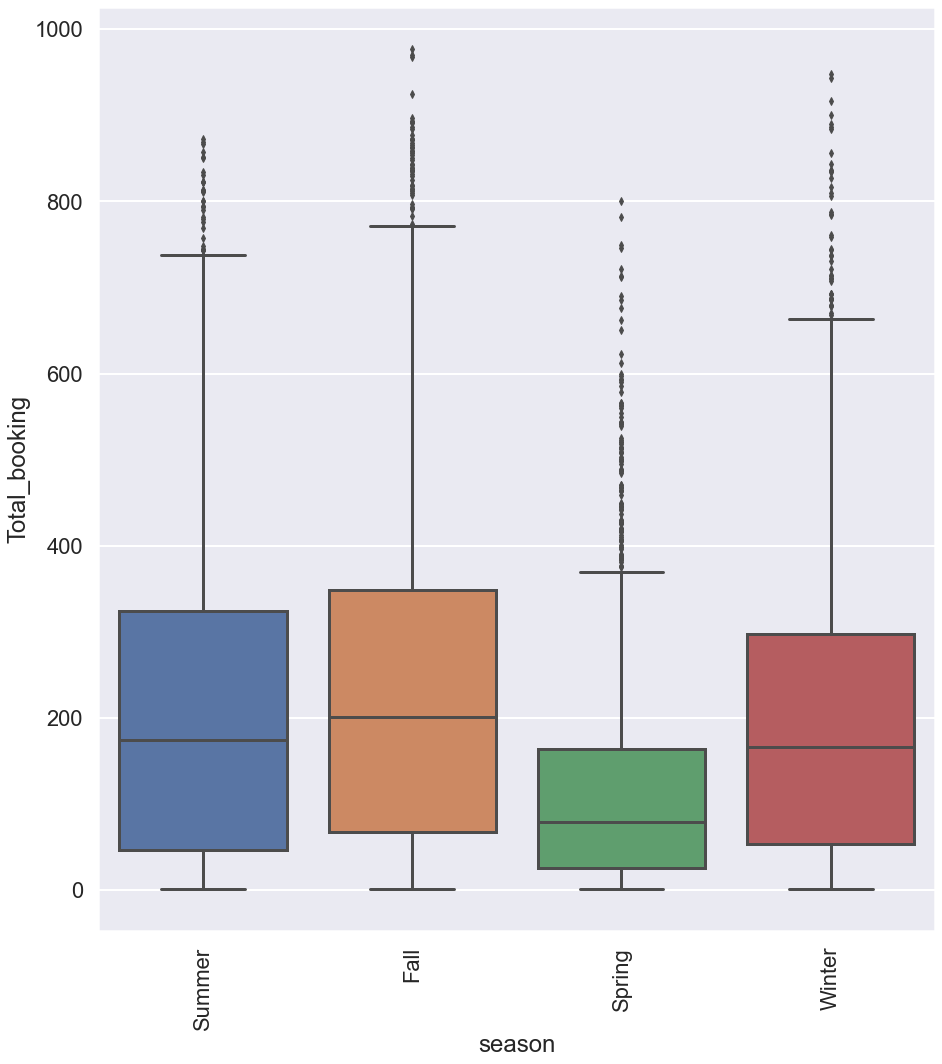

In [203]:


ax = sns.boxplot(x="season",y="Total_booking",data=df_train1)

plt.xticks(rotation=90);

# 2. Outlier Analysis


In [204]:
df_train1.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


<AxesSubplot:>

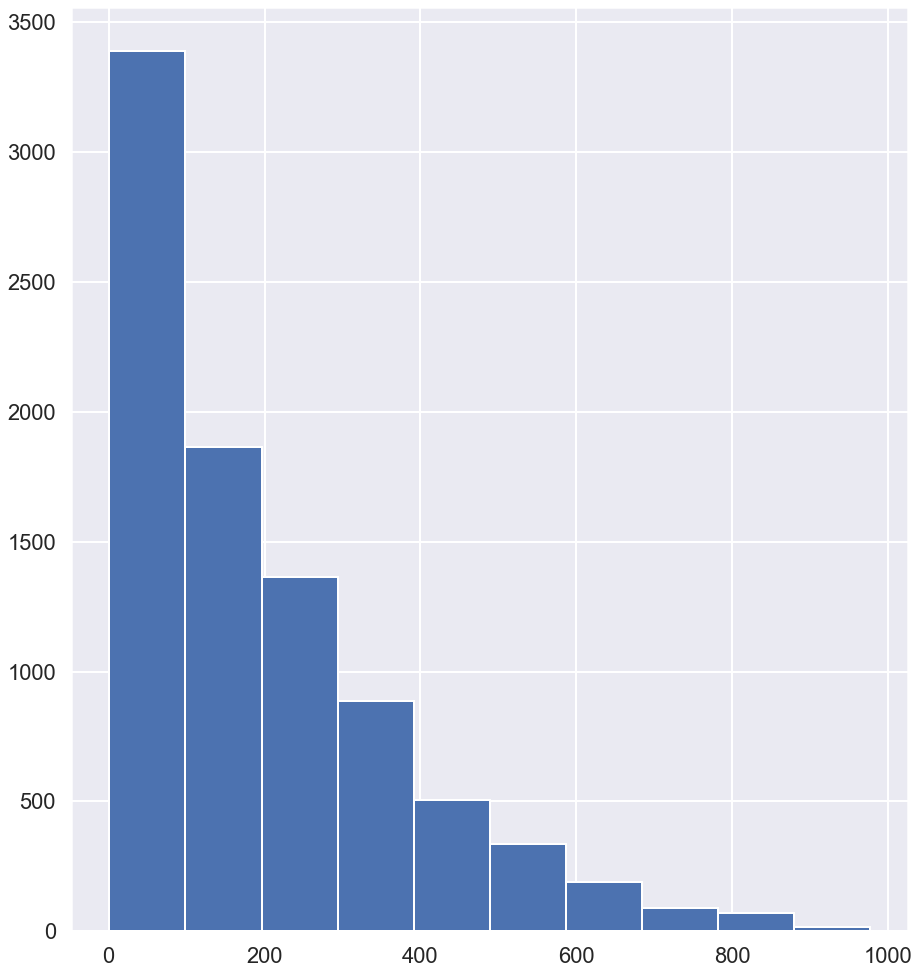

In [205]:
df_train1.Total_booking.hist()

In [206]:
booking_stats=df_train1.Total_booking.describe()
print(booking_stats)
# calculating interquartile range
iqr=booking_stats['75%']-booking_stats['25%']
upper=booking_stats['75%']+1.5*iqr
lower=booking_stats['25%']-1.5*iqr
print('Interquartile range=',iqr)
print('The upper and lower bounds for suspected outliers are {} and {}'.format(lower,upper))

count    8708.000000
mean      193.007005
std       181.552211
min         1.000000
25%        43.000000
50%       148.000000
75%       286.000000
max       977.000000
Name: Total_booking, dtype: float64
Interquartile range= 243.0
The upper and lower bounds for suspected outliers are -321.5 and 650.5


In [207]:
outliers=df_train1[df_train1.Total_booking>upper].index.tolist()
df_train1[df_train1.Total_booking>upper]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
5,8/17/2012 17:00,Fall,0,1,Clear + Few clouds,33.62,12.120,36,22.0028,791
27,5/02/2012 18:00,Summer,0,1,Clear + Few clouds,22.96,26.515,73,15.0013,813
30,7/10/2012 17:00,Fall,0,1,Clear + Few clouds,31.98,35.605,49,12.9980,872
52,6/05/2012 18:00,Summer,0,1,Clear + Few clouds,24.60,31.060,43,12.9980,790
70,5/18/2012 18:00,Summer,0,1,Clear + Few clouds,26.24,31.060,38,15.0013,669
...,...,...,...,...,...,...,...,...,...,...
8478,3/14/2012 8:00,Spring,0,1,Clear + Few clouds,18.04,21.970,82,0.0000,662
8582,10/15/2012 8:00,Winter,0,1,Mist + Cloudy,24.60,30.305,64,26.0027,737
8676,5/12/2012 13:00,Summer,0,0,Clear + Few clouds,26.24,31.060,36,12.9980,659
8681,8/08/2012 17:00,Fall,0,1,Mist + Cloudy,32.80,37.880,55,19.0012,858


In [208]:
#Original data with outliers
df_train1.shape

(8708, 10)

In [209]:
for index in outliers:
    df_train1.drop(index,inplace=True)

In [210]:
# After removing outliers
df_train1.shape

(8466, 10)

# 3. Missing value analysis

In [211]:
#we observed there is no missing values in our dataset
df_train1.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64

# 4. Visualizing Total_booking Vs other features to generate insights

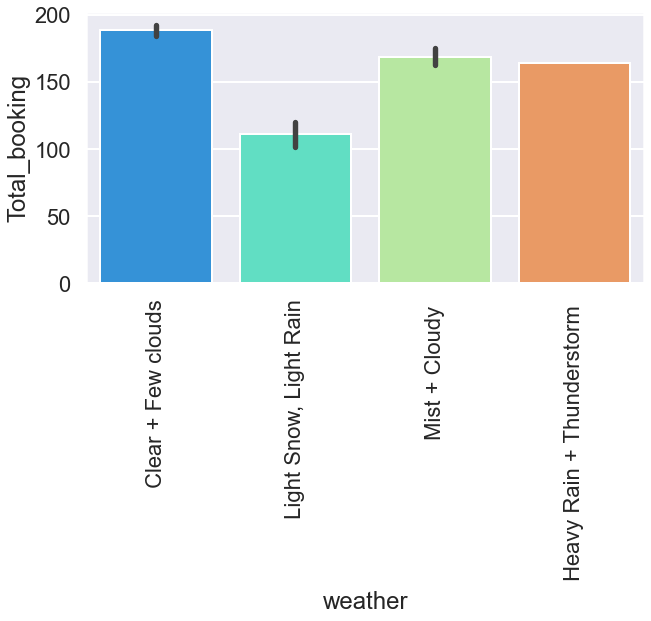

In [212]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'weather', y = 'Total_booking', data = df_train1,palette='rainbow')
plt.xticks(rotation=90);

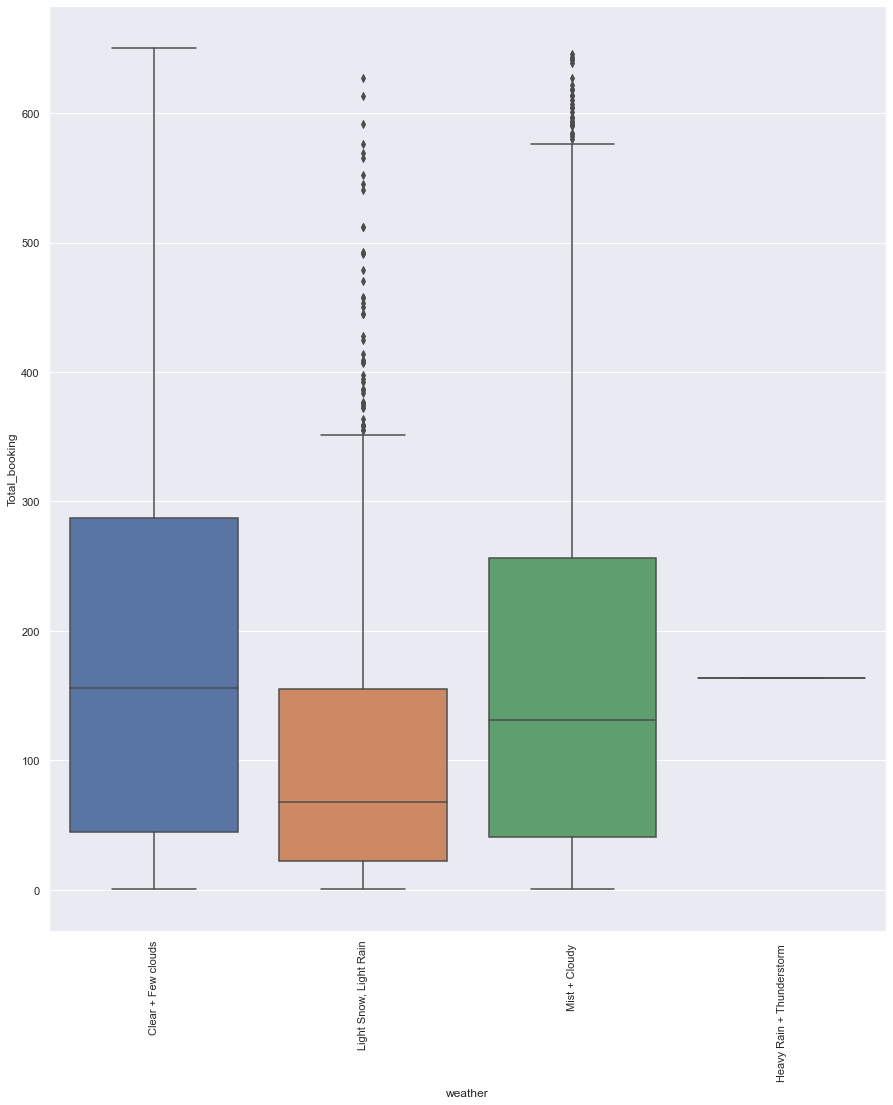

In [213]:
sns.set(rc={'figure.figsize':(15,17)})

ax = sns.boxplot(x="weather",y="Total_booking",data=df_train1)
sns.set_context("poster")
plt.xticks(rotation=90);

<AxesSubplot:xlabel='datetime', ylabel='Total_booking'>

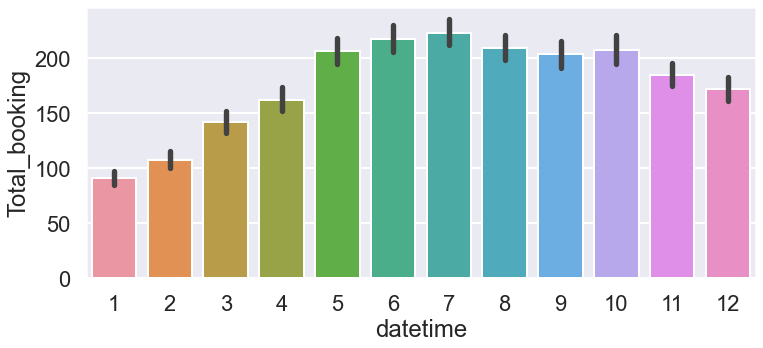

In [214]:
plt.figure(figsize=(12,5))
sns.barplot(x = pd.to_datetime(df_train1["datetime"]).dt.month, y = 'Total_booking', data = df_train1)

<AxesSubplot:xlabel='season', ylabel='Total_booking'>

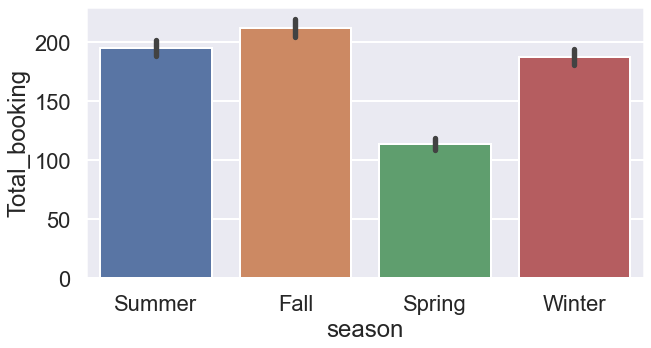

In [215]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'season', y = 'Total_booking', data = df_train1)

# 5. Correlation Analysis

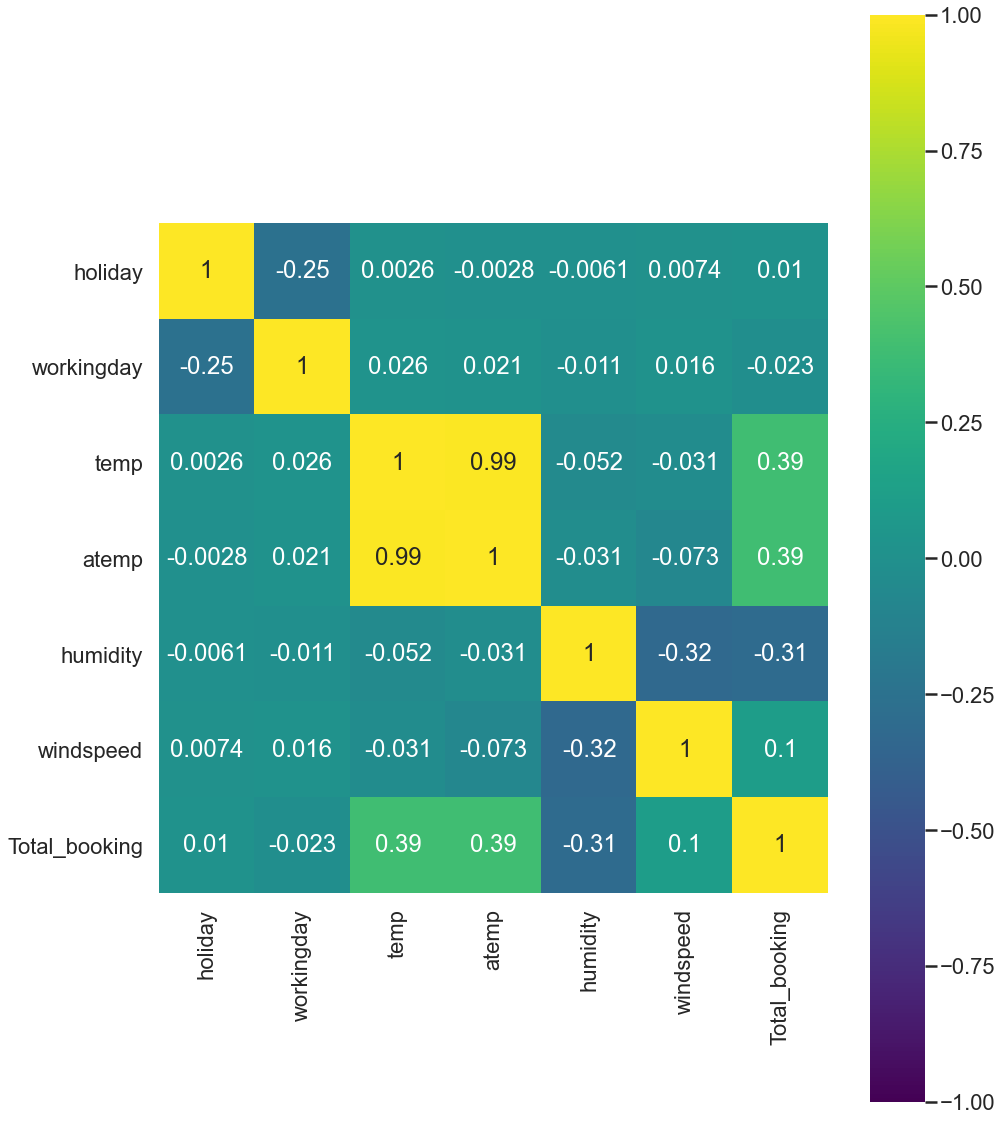

In [217]:
correlation = df_train1.corr()
fig = plt.figure(figsize = (15,20))
sns.heatmap(correlation, cmap ='viridis', annot = True, vmax = 1, square = True,vmin=-1)
plt.show()

In [219]:
df_train1.drop(columns= "atemp",inplace=True) # remove to avoid multicollinearity- Temp & atemp are highly correlated

# Task 2:
# 1. Feature Engineering

In [221]:
#Creating new column from datetime column
df_train1['date'] = pd.to_datetime(df_train1["datetime"]).dt.date
df_train1['hour'] = pd.to_datetime(df_train1["datetime"]).dt.hour
df_train1['weekday'] = pd.to_datetime(df_train1["datetime"]).dt.weekday
df_train1['month'] = pd.to_datetime(df_train1["datetime"]).dt.month

df_test1['date'] = pd.to_datetime(df_test1["datetime"]).dt.date
df_test1['hour'] = pd.to_datetime(df_test1["datetime"]).dt.hour
df_test1['weekday'] = pd.to_datetime(df_test1["datetime"]).dt.weekday
df_test1['month'] = pd.to_datetime(df_test1["datetime"]).dt.month


In [222]:
df_train1.drop(columns= "datetime",inplace=True)

In [223]:
df_train1.drop(columns= "date",inplace=True)

In [224]:
df_train1.dtypes

season            object
holiday            int64
workingday         int64
weather           object
temp             float64
humidity           int64
windspeed        float64
Total_booking      int64
hour               int64
weekday            int64
month              int64
dtype: object

In [225]:
train = pd.get_dummies(df_train1)
train.head()

,holiday,workingday,temp,humidity,windspeed,Total_booking,hour,weekday,month,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,0,1,22.14,77,16.9979,504,19,2,5,0,0,1,0,1,0,0,0
1,0,1,28.70,79,19.0012,5,4,2,9,1,0,0,0,1,0,0,0
2,0,1,5.74,50,22.0028,139,9,3,1,0,1,0,0,1,0,0,0
3,0,1,13.94,29,8.9981,209,16,4,11,0,0,0,1,1,0,0,0
4,0,1,30.34,51,19.0012,184,13,1,9,1,0,0,0,1,0,0,0


In [226]:
train.shape

(8466, 17)

# Splitting into X and y

In [227]:
X = train.drop('Total_booking', axis =1)
y = train['Total_booking']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)


(6772, 16)
(1694, 16)


# 2. Grid search cv

In [229]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid  
param_grid = {
    'bootstrap': [True],
    'max_depth': [20,30,40,],
    'n_estimators': [300, 500, 1000, 1200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RF_reg, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                                             random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [20, 30, 40],
                         'n_estimators': [300, 500, 1000, 1200]},
             verbose=2)

In [230]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 30, 'n_estimators': 1200}

In [231]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=30, n_estimators=1200, n_jobs=-1,
                      random_state=0)

In [232]:
cvrf_grid = grid_search.best_estimator_
#Predict the model
y_pred_clf = cvrf_grid.predict(X_test)
print("R squared value for GridSearch :", r2_score(y_test, y_pred_clf))
print("MSE for GridSearch :", mean_squared_error(y_test, y_pred_clf))


R squared value for GridSearch : 0.8631871485214649
MSE for GridSearch : 3435.2442996950117


<AxesSubplot:>

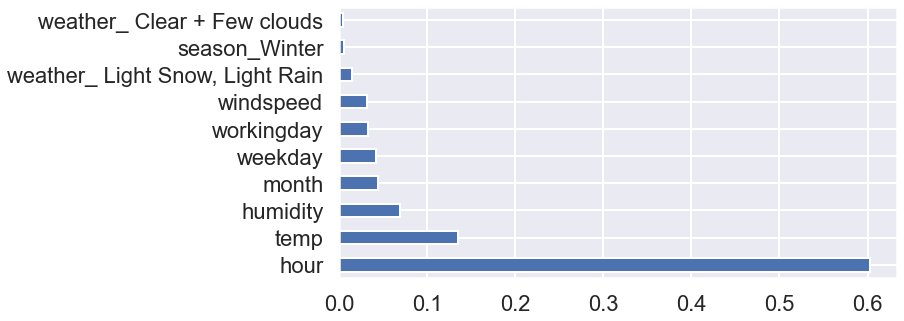

In [233]:
# FEATURE IMPORTANCE
feat_importances = pd.Series(cvrf_grid.feature_importances_, index=X_train.columns)
f, ax = plt.subplots(figsize=(10,5))
feat_importances.nlargest(10).plot(kind='barh')

# 3.Regression Analysis


In [234]:
# Decision Tree Model
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)
y_pred_DT = DT_model.predict(X_test)
y_pred_train = DT_model.predict(X_train)

# RANDOM FOREST
RF_model = RandomForestRegressor( random_state = 0)
RF_model.fit(X_train,y_train)
y_pred_RF = RF_model.predict(X_test)
y_pred_train = RF_model.predict(X_train)


# XG BOOST
XG_model = XGBRFRegressor()
XG_model.fit(X_train, y_train)
y_pred_XG = XG_model.predict(X_test)

# SVM 
SVM_model = SVR()
SVM_model.fit(X_train, y_train)
y_pred_SVM = SVM_model.predict(X_test)

# KNN 
KNN_model = KNeighborsRegressor()
KNN_model.fit(X_train, y_train)
y_pred_KNN = KNN_model.predict(X_test)

# Gradient Boosting
GB_model = GradientBoostingRegressor()
GB_model.fit(X_train, y_train)
y_pred_GB = GB_model.predict(X_test)


# PERFORMANCE METRICS

In [235]:
from sklearn.metrics import r2_score, mean_squared_error
print("R squared value for DT :", r2_score(y_test, y_pred_DT))
print("R squared value for RF:", r2_score(y_test, y_pred_RF))
print("R squared value for XG:", r2_score(y_test, y_pred_XG))
print("R squared value for SVM:", r2_score(y_test, y_pred_SVM))
print("R squared value for KNN:", r2_score(y_test, y_pred_KNN))
print("R squared value for GB:", r2_score(y_test, y_pred_GB))


print("MSE for DT :", mean_squared_error(y_test, y_pred_DT))
print("MSE for RF:", mean_squared_error(y_test, y_pred_RF))
print("MSE for XG:", mean_squared_error(y_test, y_pred_XG))
print("MSE for SVM:", mean_squared_error(y_test, y_pred_SVM))
print("MSE for KNN:", mean_squared_error(y_test, y_pred_KNN))
print("MSE for GB:", mean_squared_error(y_test, y_pred_GB))

R squared value for DT : 0.7271318698155134
R squared value for RF: 0.8643440715908561
R squared value for XG: 0.72100867335142
R squared value for SVM: 0.2527367971874709
R squared value for KNN: 0.58837357730728
R squared value for GB: 0.8006458351961473
MSE for DT : 6851.466646989375
MSE for RF: 3406.1950302999126
MSE for XG: 7005.214453002243
MSE for SVM: 18763.08862867555
MSE for KNN: 10335.559173553718
MSE for GB: 5005.598895585769


# 4. Ensemble Model

In [236]:
# RANDOM FOREST-

from sklearn.ensemble import RandomForestRegressor
# 1000 trees, samples creation with replacement(bootsrap = true), n_jobs = -1 full processing of system

RF_reg = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, random_state=0)  

#fit the model
RF_reg = RF_reg.fit(X_train, y_train)

#Predict the model
y_pred_RFR = RF_reg.predict(X_test)

print("R squared:",r2_score(y_test,y_pred_RFR))


R squared: 0.863247269153521


# Comparing with the test-project dataset and predicting the output with grid search cv model

In [238]:
del(df_test1["datetime"])

In [239]:
del(df_test1["atemp"])

In [240]:
del(df_test1["date"])

In [241]:
df_test1.shape

(2178, 11)

In [242]:
df_test1.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'Total_booking', 'hour', 'weekday', 'month'],
      dtype='object')

In [243]:
test = pd.get_dummies(df_test1)
test.head()

,holiday,workingday,temp,humidity,windspeed,Total_booking,hour,weekday,month,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,0,1,21.32,48,35.0008,256,11,3,5,0,0,1,0,1,0,0
1,0,0,23.78,64,7.0015,87,7,5,6,0,0,1,0,1,0,0
2,0,0,11.48,100,27.9993,11,20,6,3,0,1,0,0,0,1,0
3,0,1,25.42,83,0.0000,84,11,3,10,0,0,0,1,0,0,1
4,0,0,25.42,43,23.9994,668,12,5,6,0,0,1,0,1,0,0


In [ ]:
test.shape

In [244]:
# Fitting Grid Search Model to test dataset

New_pred = cvrf_grid.predict(test)
print("R squared for prediction v/s test_label:",r2_score(df_test_label, New_pred))
print("MSE for prediction v/s test_label :", mean_squared_error(df_test_label, New_pred))


R squared for prediction v/s test_label: -0.5432576654445824
MSE for prediction v/s test_label : 49663.66056638111
